# Project: Bayesian Classifier Sampling of the MNIST Dataset based on Gaussian Models (GM) and Gaussian Mixture Models (GMM):
* The objective of this project is to demonstrate how to model MINIST images using Gaussian Models (GM) and Mixture Gaussian Models (GMM)  and reconstruct each image from its GM or GMM models:

In this work, we consider two ways we can learn the posterior distribution p(x|y) from all the training data x that belongs to class y:

1. Model the data as Gaussian Model (GM) distribution with mean and covariance estimated from the training data x belong to class y
2. Model the data as Gaussian Mixture Model (GMM) distribution with multiple clusters means and covariances estimated from the training data x belong to class y.


### Author: Mohsen Ghazel (mghazel)
* Date: May 9th, 2021

## Part 1: Python imports and global variables: 

### 1.1) Python imports:

In [34]:
#------------------------------------------------------
# Python imports and environment setup
#------------------------------------------------------
# opencv
import cv2
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt

# import additional functionalities
from __future__ import print_function, division
from builtins import range, input

# import the multi-variate normal distribution 
# sampling from Scipy
from scipy.stats import multivariate_normal as mvn
# import the Gaussian Mixure Model (GMM) distribution 
# sampling from Scipy
from sklearn.mixture import BayesianGaussianMixture

# import shuffle  from sklearn
from sklearn.utils import shuffle

# import pandas
import pandas as pd

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard unform: U(0,1)
from random import random
# time
import datetime
# I/O
import os
# sys
import sys

# display figure within the notebook
%matplotlib inline

#------------------------------------------------------
# Test imports and display package versions
#------------------------------------------------------
# Testing the OpenCV version
print("OpenCV : ",cv2.__version__)
# Testing the numpy version
print("Numpy : ",np.__version__)

OpenCV :  3.4.8
Numpy :  1.19.2


#### 1.2) Global variables:

In [35]:
# set the random_state seed = 100 for reproducibilty
random_state_seed = 100

# the number of visualized images
num_visualized_images = 25

## Part 2: Read the input data:

* We use the MINIST dataset, which was downloaded from the following link: 
  * Kaggle: Digit Recognizer: https://www.kaggle.com/c/digit-recognizer/data
  * The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
  * Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
  * The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

  * Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).
  

### 2.1) Load and normalize the training data sets:

In [36]:
# read the training data set
data = pd.read_csv('../large_files/train.csv').values.astype(np.float32)
# normalize the training data to [0,1]:
x_train = data[:, 1:] / 255
# format the class type to integer
y_train = data[:, 0].astype(np.int32)
# shuffle the data
x_train, y_train = shuffle(x_train, y_train)

#------------------------------------------------------
# Display a summary of the training data:
#------------------------------------------------------
# the number of training images
num_train_images = x_train.shape[0]
print("----------------------------------------------")
print("Training data:")
print("----------------------------------------------")
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("Number of training images: ", num_train_images)
print("Image size: ", x_train.shape[1:])
print("----------------------------------------------")
print("Classes/labels:")
print("----------------------------------------------")
print('The target labels: ' + str(np.unique(y_train)))
print("----------------------------------------------")

----------------------------------------------
Training data:
----------------------------------------------
x_train.shape:  (42000, 784)
y_train.shape:  (42000,)
Number of training images:  42000
Image size:  (784,)
----------------------------------------------
Classes/labels:
----------------------------------------------
The target labels: [0 1 2 3 4 5 6 7 8 9]
----------------------------------------------


### 2.2) Visualize some of the training images and their associated targets:
#### 2.2.1) First implement a visualization functionality to visualize the number of randomly selected images:

In [37]:
"""
# A utility function to visualize multiple images:
"""
def visualize_images_and_labels(num_visualized_images = 25, dataset_flag = 1):
  """To visualize images.

      Keyword arguments:
         - num_visualized_images -- the number of visualized images (deafult 25)
         - dataset_flag -- 1: training dataset, 2: test dataset
      Return:
         - None
  """
  #--------------------------------------------
  # the suplot grid shape:
  #--------------------------------------------
  num_rows = 5
  # the number of columns
  num_cols = num_visualized_images // num_rows
  # setup the subplots axes
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 10))
  # set a seed random number generator for reproducible results
  seed(random_state_seed)
  # iterate over the sub-plots
  for row in range(num_rows):
      for col in range(num_cols):
        # get the next figure axis
        ax = axes[row, col];
        # turn-off subplot axis
        ax.set_axis_off()
        #--------------------------------------------
        # if the dataset_flag = 1: Training data set
        #--------------------------------------------
        if ( dataset_flag == 1 ): 
          # generate a random image counter
          counter = randint(0,num_train_images)
          # get the training image
          image = np.squeeze(x_train[counter,:])
          # get the target associated with the image
          label = y_train[counter]
        #--------------------------------------------
        # dataset_flag = 2: Test data set
        #--------------------------------------------
        else: 
          # generate a random image counter
          counter = randint(0,num_test_images)
          # get the test image
          image = np.squeeze(x_test[counter,:])
          # get the target associated with the image
          label = y_test[counter]
        #--------------------------------------------
        # display the image
        #--------------------------------------------
        ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        # set the title showing the image label
        ax.set_title('y =' + str(label), size = 8)

#### 2.2.2) Call the function to visualize the randomly selected training images:

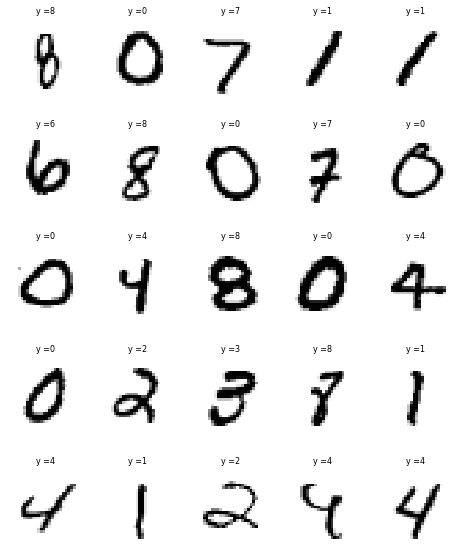

In [38]:
# the number of selected training images
num_visualized_images = 25
# call the function to visualize the training images
visualize_images_and_labels(num_visualized_images, 1)

### 2.3) Examine the number of images for each class of the training and testing subsets:

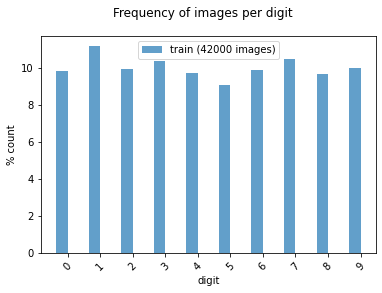

In [39]:
# create a histogram of the number of images in each class/digit:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('digit')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Frequency of images per digit')
plot_bar(y_train, loc='left')
plt.legend([
    'train ({0} images)'.format(len(y_train))
]);

## Part 3: Implement the Bayesian Classification and Sampling using Gaussian Models (GM):

### 3.1) Implement a utility function
* This function that the data values ranges between 0 and 1

In [62]:
def clamp_sample(x):
  """
  This function that the data values ranges between 0 and 1
  """
  x = np.minimum(x, 1)
  x = np.maximum(x, 0)
  return x

### 3.2) Implement the Bayesian Classifier Classifier based on Gaussian Models (GM):

In [63]:
class BayesClassifierGM:
  """
  This implements the GM-based BayesClassifier class
  """
  def fit(self, X, Y):
    # assume classes are numbered 0...K-1
    self.K = len(set(Y))
    # Initialize the gaussians list to empty
    self.gaussians = []
    # Initialize the prior probabilities
    self.p_y = np.zeros(self.K)
    # iterate ove rthe classes
    for k in range(self.K):
      # get the training data for class k
      Xk = X[Y == k]
      # keep track of the number of 
      # training examples in this class
      self.p_y[k] = len(Xk)
      # compute the mean of the training data in this class
      mean = Xk.mean(axis=0)
      # compute the covariance of the training data in this class
      cov = np.cov(Xk.T)
      # store the means and covariance in a dictionary
      g = {'m': mean, 'c': cov}
      # append g to the guassians list
      self.gaussians.append(g)
    # normalize p(y) to convert frequencies to probabilities
    self.p_y /= self.p_y.sum()
  
  def sample_given_y(self, y):
    """
    This function generates a gaussian random 
    sample coresponding to class y.
    """
    # get the Guassian statistics (mean and covariance) for class y
    g = self.gaussians[y]
    # generate a multi-variate Guassian random sample with the 
    # corresponding statistics
    # - ensure that the random samples are between 0 and 1
    # - return the generated sample
    return clamp_sample( mvn.rvs(mean=g['m'], cov=g['c']) )

  def sample(self):
    """
    This function generates a gaussian random 
    sample coresponding to a randomly selected class y
    """
    y = np.random.choice(self.K, p=self.p_y)
    return y, clamp_sample( self.sample_given_y(y) )

### 3.3) Implement the GM-based Bayesian Classifier fitting and sampling:

#### 3.3.1) Instantiate and fit the GM-based Bayesian Classifier:

In [64]:
# Instantiate the Gaussian Model (GM) based Bayesian Classifer
clf = BayesClassifierGM()
# Fit the Bayesian Classifier to the training data
clf.fit(x_train, y_train)

#### 3.3.2) Use the GM-based Bayesian Classifier to generate samples from each class:

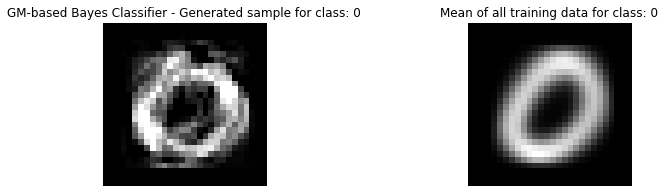

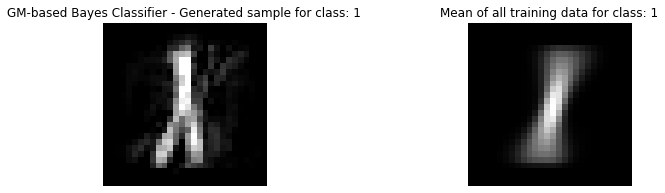

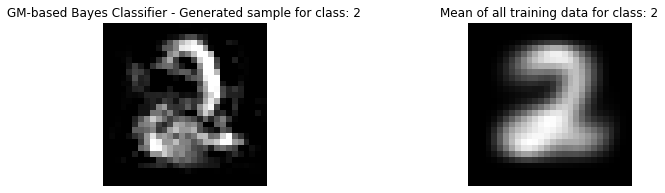

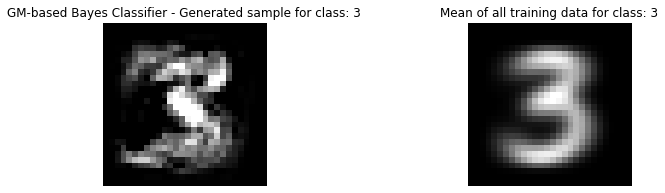

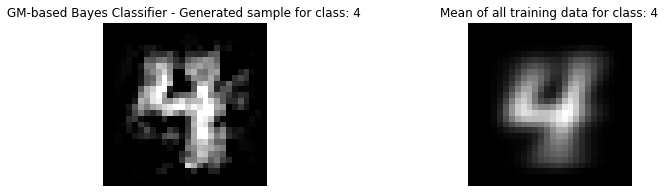

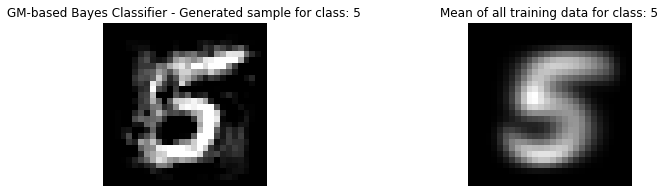

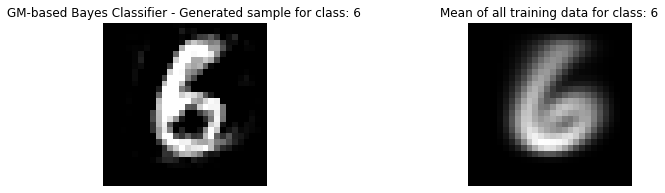

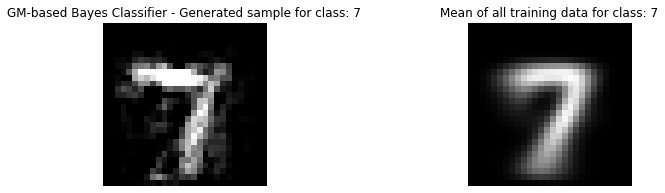

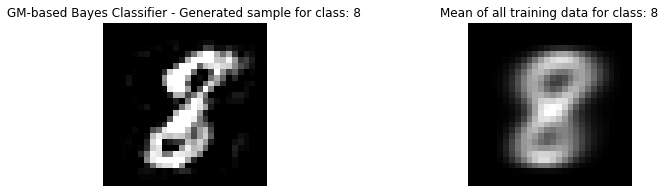

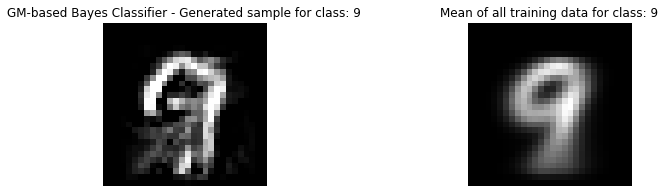

In [65]:
#----------------------------------------
# Iterarate over the classes
#----------------------------------------
for k in range(clf.K):
    #----------------------------------------
    # Step 1: generate Gaussian sample
    #----------------------------------------
    sample = clf.sample_given_y(k).reshape(28, 28)
    # generate the mean
    mean = clf.gaussians[k]['m'].reshape(28, 28)
    #----------------------------------------
    # Step 2: generate sample mean
    #----------------------------------------
    # create a figure and set its axis
    fig_size = (12,3)
    # create the figure 
    plt.figure(figsize=fig_size)
    # display the sample
    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("GM-based Bayes Classifier - Generated sample for class: " + str(k), fontsize = 12)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean of all training data for class: " + str(k), fontsize = 12)
    plt.axis('off')
    plt.show()


#### 3.2.3) Generate a random sample from a random class:

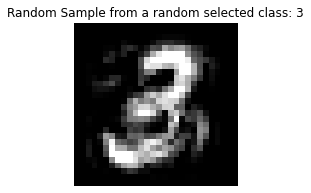

In [68]:
# generate a random sample froma random class
k, sample = clf.sample()
# reshape the sample into 28x28 image
sample = sample.reshape(28, 28)
# create a figure and set its axis
fig_size = (3,3)
# create the figure 
plt.figure(figsize=fig_size)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from a random selected class: " + str(k), fontsize = 12)
plt.axis('off')
plt.show()

## Part 4: Implement the Bayesian Classification and Sampling based on Gaussian Mixture Models (GMM):

### 4.1) Implement the Bayesian Classifier Classifier based on Gaussian Mixture Models (GMM):

In [46]:
class BayesClassifierGMM:
  """
  This implements the GMM-based BayesClassifier class
  """
  def fit(self, X, Y):
    # assume classes are numbered 0...K-1
    self.K = len(set(Y))
    # initialize the gaussian list to empty
    self.gaussians = []
    # initialize the prior probabilities to zeros
    self.p_y = np.zeros(self.K)
    # iterate ove rthe classes
    for k in range(self.K):
      # get the training data corresponding to class k
      Xk = X[Y == k]
      # update the probability to the number of training images in class: k
      self.p_y[k] = len(Xk)
      # instantiate a GMM model with max number of clusters = 10 
      gmm = BayesianGaussianMixture(10)
      # fit the GMM model to the training data corrsponding to class: k
      gmm.fit(Xk)
      # append the generated GMM model to Gaussian
      self.gaussians.append(gmm)
    # normalize p(y) to convert frequency to probability
    self.p_y /= self.p_y.sum()

  def sample_given_y(self, y):
    """
    This function generates samples from class y
    """
    # get the GMM model corresponding to class y
    gmm = self.gaussians[y]
    # generate a sample using the GMM model corresponding to class y
    sample = gmm.sample()
    #---------------------------------------------------
    # Note:
    #---------------------------------------------------
    # - sample returns a tuple containing 2 things:
    # 1) the sample
    # 2) which cluster it came from
    #---------------------------------------------------
    # we'll use (2) to obtain the means so we can plot
    # them like we did in the previous script
    # we cheat by looking at "non-public" params in
    # the sklearn source code
    #---------------------------------------------------
    # the mean of the cluster from which the sample was generated
    mean = gmm.means_[sample[1]]
    # return teh generated sample and the cluster mean
    return clamp_sample( sample[0].reshape(28, 28) ), mean.reshape(28, 28)

  def sample(self):
    """
    This function generates a gaussian random 
    sample coresponding to a randomly selected class y
    """
    # randomly generate the class
    y = np.random.choice(self.K, p=self.p_y)
    # randomly generate the class
    return y, clamp_sample( self.sample_given_y(y) )


### 4.2) Implement the GMM-based Bayesian Classifier fitting and sampling:

#### 4.2.1) Instantiate and fit the GMM-based Bayesian Classifier:

In [47]:
# Instantiate the Gaussian Mixure Model (GMM) based Bayesian Classifer
clf = BayesClassifierGMM()
# Fir the Bayesian Classifer to the training data
clf.fit(x_train, y_train)

C:\Users\mghaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\mghaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\mghaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\mghaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will r

#### 4.2.2) Use the GMM-based Bayesian Classifier to generate samples from each class:

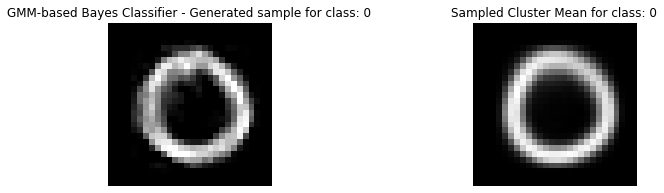

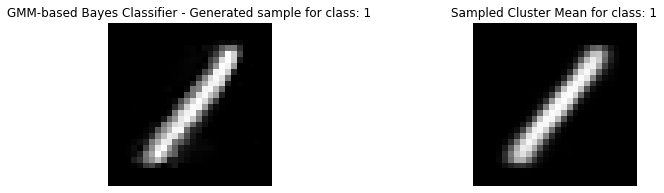

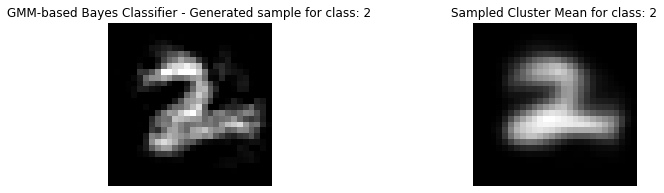

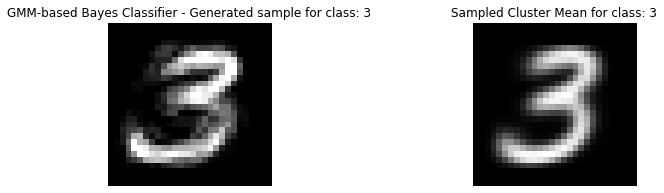

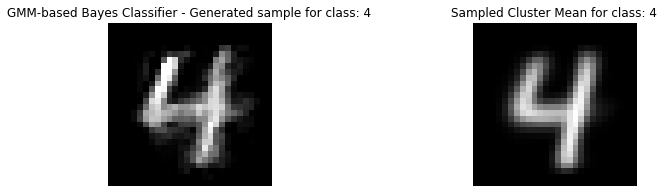

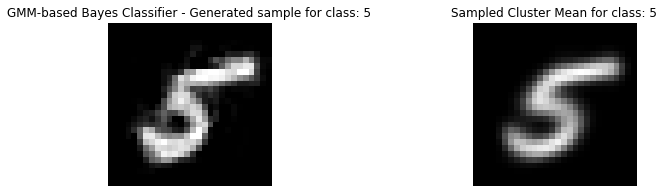

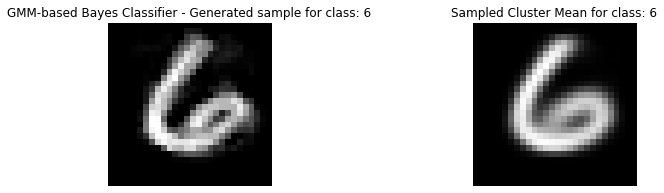

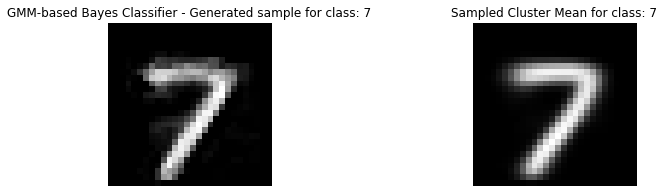

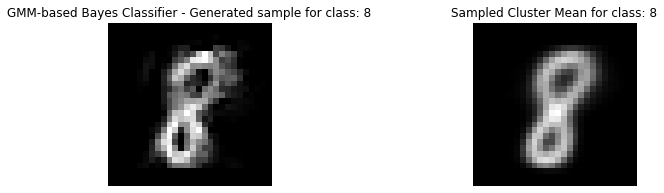

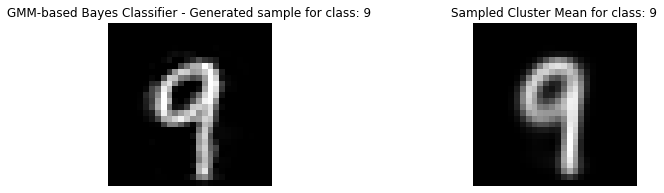

In [60]:
#----------------------------------------
# Iterarate over the classes
#----------------------------------------
for k in range(clf.K):
    #----------------------------------------
    # Step 1: show one sample for each class
    #  - also show the mean image learned
    #----------------------------------------
    sample, mean = clf.sample_given_y(k)

    #----------------------------------------
    # Step 2: generate sample mean
    #----------------------------------------
    # create a figure and set its axis
    fig_size = (12,3)
    # create the figure 
    plt.figure(figsize=fig_size)
    # display the sample
    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("GMM-based Bayes Classifier - Generated sample for class: " + str(k), fontsize = 12)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Sampled Cluster Mean for class: " + str(k), fontsize = 12)
    plt.axis('off')
    plt.show()

#### 4.2.3) Generate a random sample from a random class:

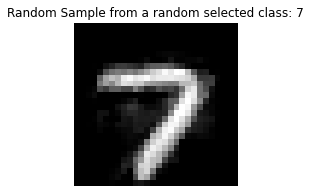

In [58]:
# generate a random sample from a random class
k, (sample, mean) = clf.sample()
# create a figure and set its axis
fig_size = (3,3)
# create the figure 
plt.figure(figsize=fig_size)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from a random selected class: " + str(k), fontsize = 12)
plt.axis('off')
plt.show()

#### Step 5: Display a successful execution message:

In [59]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-05-10 12:01:48...Goodbye!

